In [1]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import numpy as np
from matplotlib import pyplot as plt

/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Open the raw data

In [2]:
height_map_values = open('height_map_data.txt').read()

In [3]:
each_point_height_values = height_map_values.split('\n7\n')

In [4]:
height_map = [[float(x.split(',')[1][4:]) for x in point.split('\n') if len(x)> 3] for point in each_point_height_values]
height_map = np.array(height_map)

In [5]:
useful_values_height_map = height_map[:, 2:]

This is the height at each point

In [6]:
average_height_at_each_point = np.average(useful_values_height_map, 1)

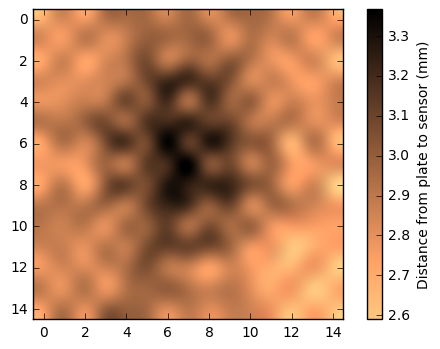

In [32]:
height_in_mm = average_height_at_each_point.reshape(
    15,15)/95.6/7.4+12.5/7.4
plt.imshow(
    height_in_mm,
    cmap='copper_r',
    interpolation='lanczos')
plt.colorbar(label='Distance from plate to sensor (mm)')

# Now we take an angular average:

In [25]:
grid_points = np.array([[x, y] for x in range(15) for y in range(15)])
radius_equation = lambda x_y: np.sqrt(x_y[0]**2. + x_y[1]**2.)
radii = np.array([radius_equation((grid_points - np.array([7, 7]))[i])
         for i in range(grid_points.size//2)])
radius_height = average_height_at_each_point

The height vs the radius:

In [49]:
height_radius = np.dstack(
    (height_in_mm[grid_points[:,0], grid_points[:, 1]],
    radii))[0]

In [66]:
unique_radii = np.unique(height_radius[:, 1])
average_heights = np.zeros(unique_radii.size)
std_average_heights = np.zeros(unique_radii.size)
for i in range(unique_radii.size):
    indices_to_average = np.argwhere(
        height_radius[:, 1]==unique_radii[i])
    average_heights[i] = np.average(
        height_radius[indices_to_average, 0])
    std_average_heights[i] = np.std(
        height_radius[indices_to_average, 0])

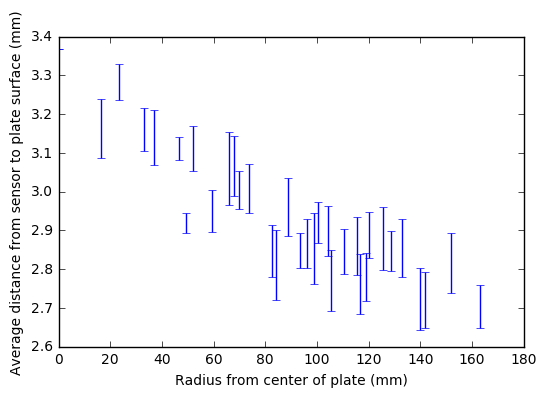

In [74]:
mm_per_gridpoint = 16.485
plt.errorbar(
    unique_radii*mm_per_gridpoint, average_heights, yerr=std_average_heights,
    fmt='none')
plt.xlabel("Radius from center of plate (mm)")
plt.ylabel("Average distance from sensor to plate surface (mm)")

In [68]:
plt.errorbar?